In [1]:
# Draw all defined logic elements, with color and fill

In [2]:
import schemdraw
from schemdraw import logic
schemdraw.use('svg')

In [3]:
def drawElements(elm_list, n=5, dx=1, dy=2, ofst=.8, fname=None, **kwargs):
    x, y = 0, 0
    d = schemdraw.Drawing(fontsize=12)
    for e in elm_list:
        element = getattr(logic, e)
        A = d.add(element, xy=[(d.unit+1)*x+1,y], toplabel=e, **kwargs)
        x = x + dx
        if x >= n:
            x=0
            y=y-dy
    return d

elist = ['And', 'Nand', 'Or', 'Nor', 'Xor', 'Xnor', 'Buf', 'Not', 'NotNot', 'Tgate',
         'Schmitt', 'SchmittNot', 'SchmittAnd', 'SchmittNand']

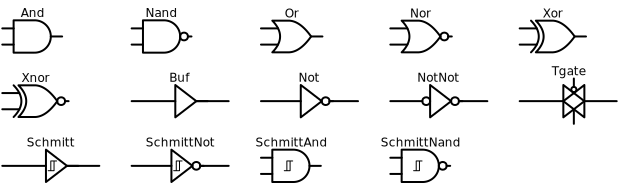

In [4]:
display(drawElements(elist, d='right'))

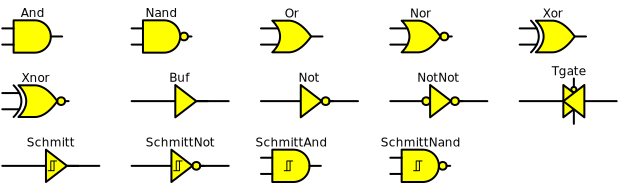

In [5]:
display(drawElements(elist, d='right', fill='yellow'))

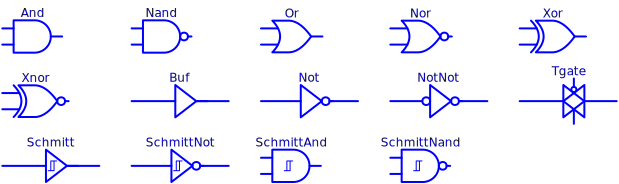

In [6]:
display(drawElements(elist, d='right', color='blue'))

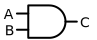

In [7]:
d = schemdraw.Drawing()
G = d.add(logic.And())
G.add_label('A', loc='in1')
G.add_label('B', loc='in2')
G.add_label('C', loc='out')
d.draw()

In [8]:
logic.And(inputs=5)

In [9]:
logic.Or(inputs=5)

In [10]:
logic.Or(inputs=5, inputnots=[1, 2, 3, 4, 5])